## Data Mining Mini-Project :
## Réalisé par : Yassin EL GHZIRI,Youness CHETOUAN
    

### 1-importation des packages


In [119]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy as sc
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### 2-chargement des données

In [120]:
url="adult.csv"
dataset=pd.read_csv(url)

### 3-affichage des données

In [121]:
dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### 4-dimension des données:

In [122]:
print(dataset.shape)

(48842, 15)


### 5-regroupement des données par valeur: 

In [123]:
dataset.groupby('income').size()

income
<=50K    37155
>50K     11687
dtype: int64

### 6- les statistiques descriptives des données:

In [124]:
dataset.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 8-l'ensemble des valeurs de chaque colonne: 

In [125]:
field_space_map = dict([(attribute, set([record[attribute] for (_,record) in dataset.iterrows()])) for attribute in dataset if attribute in ['workclass', 'education', 'educational-num', 'marital-status', 'occupation','relationship','race'] ])
pd.DataFrame.from_dict(field_space_map, orient="index")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
workclass,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Never-worked,Without-pay,Private,?,None,None,None,None,None,None,None
education,Some-college,11th,7th-8th,9th,Preschool,HS-grad,Masters,Doctorate,Assoc-acdm,10th,Prof-school,Assoc-voc,1st-4th,Bachelors,12th,5th-6th
educational-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
marital-status,Never-married,Married-civ-spouse,Separated,Married-spouse-absent,Divorced,Married-AF-spouse,Widowed,None,None,None,None,None,None,None,None,None
occupation,Adm-clerical,Craft-repair,Armed-Forces,Exec-managerial,Transport-moving,Farming-fishing,Handlers-cleaners,Tech-support,Machine-op-inspct,Prof-specialty,Priv-house-serv,Protective-serv,Other-service,?,Sales,None
relationship,Other-relative,Not-in-family,Wife,Husband,Unmarried,Own-child,None,None,None,None,None,None,None,None,None,None
race,Other,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,None,None,None,None,None,None,None,None,None,None,None


### 9-les boîtes à moustaches pour les attributs numériques: 

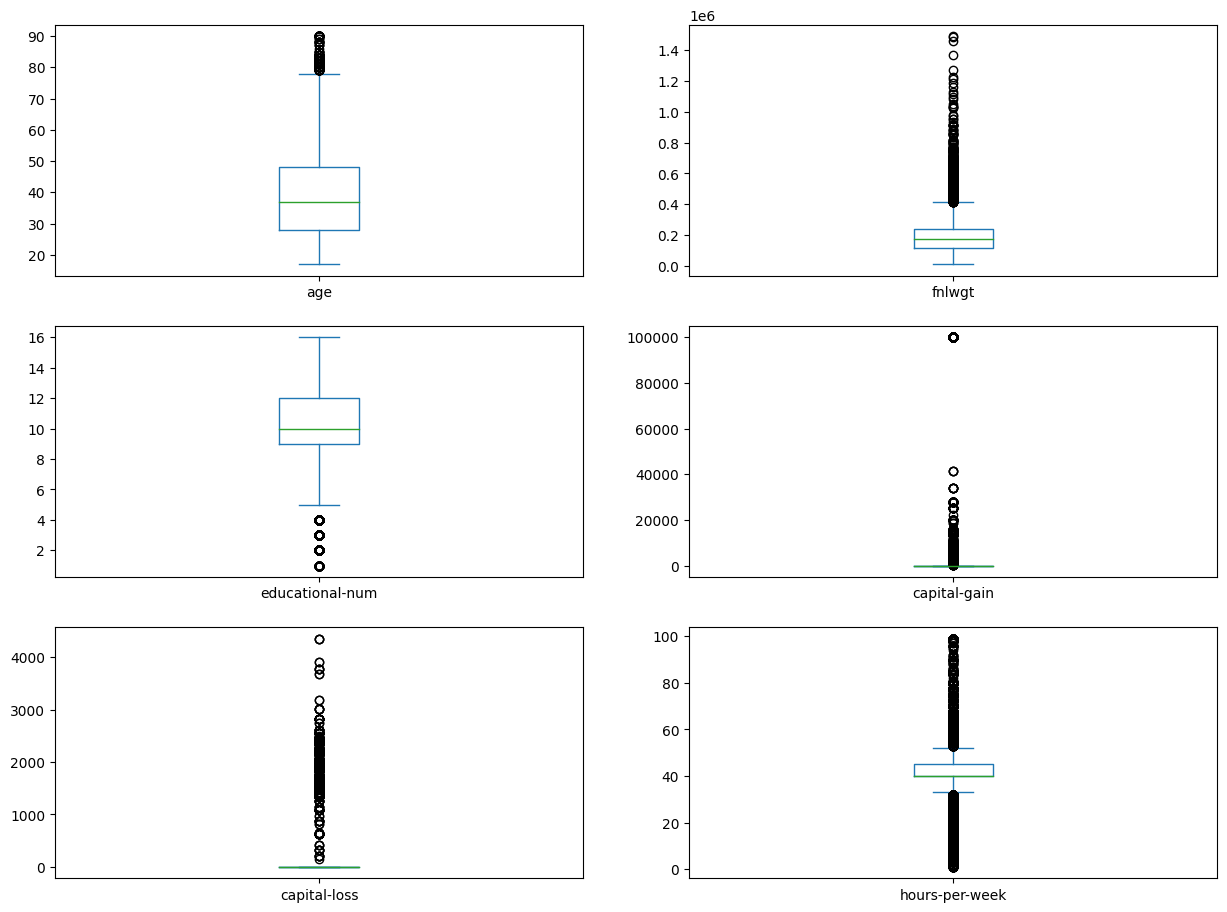

In [126]:
dataset.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False,
figsize=(15,15))
plt.show()

### 10-les histogrammes pour les attributs numériques: 

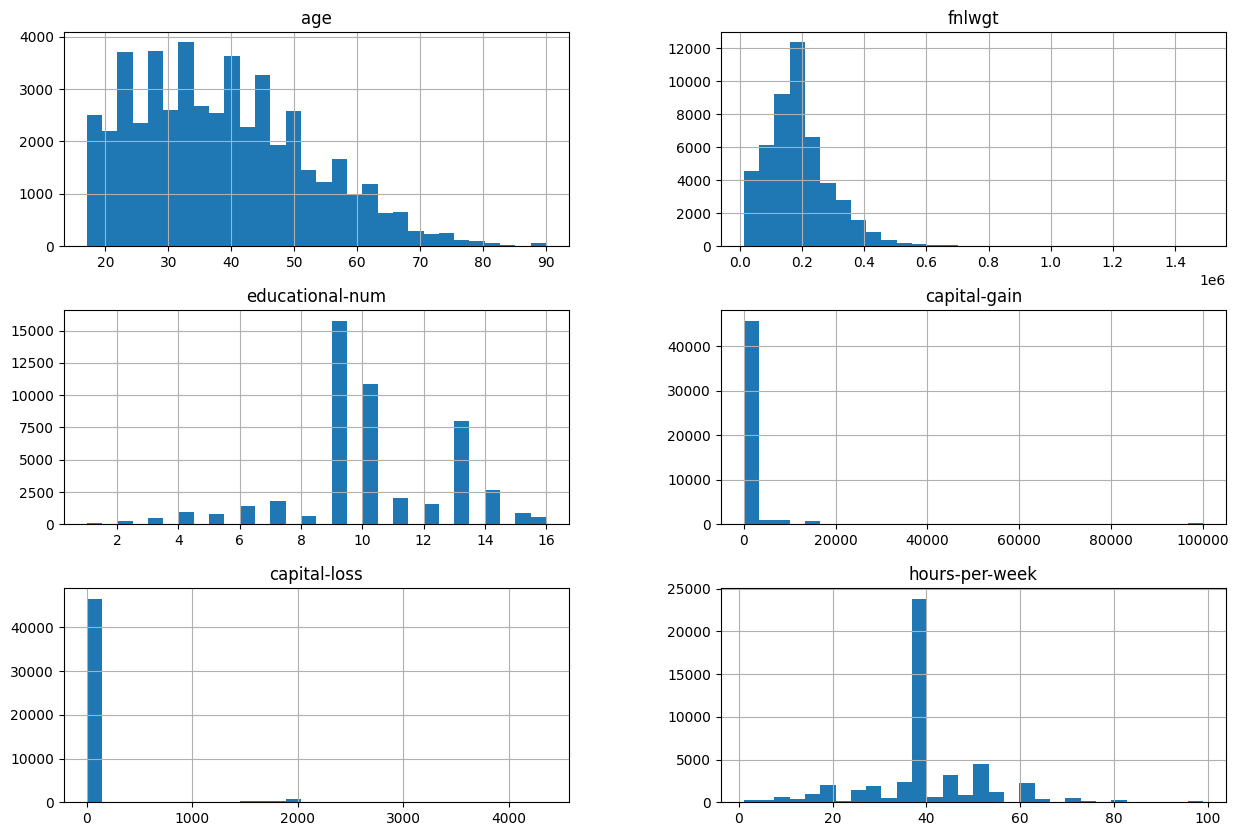

In [127]:
dataset.hist(bins=30,figsize=(15,10))
plt.show()


### 11-les nuages de points pour les attributs numériques: 

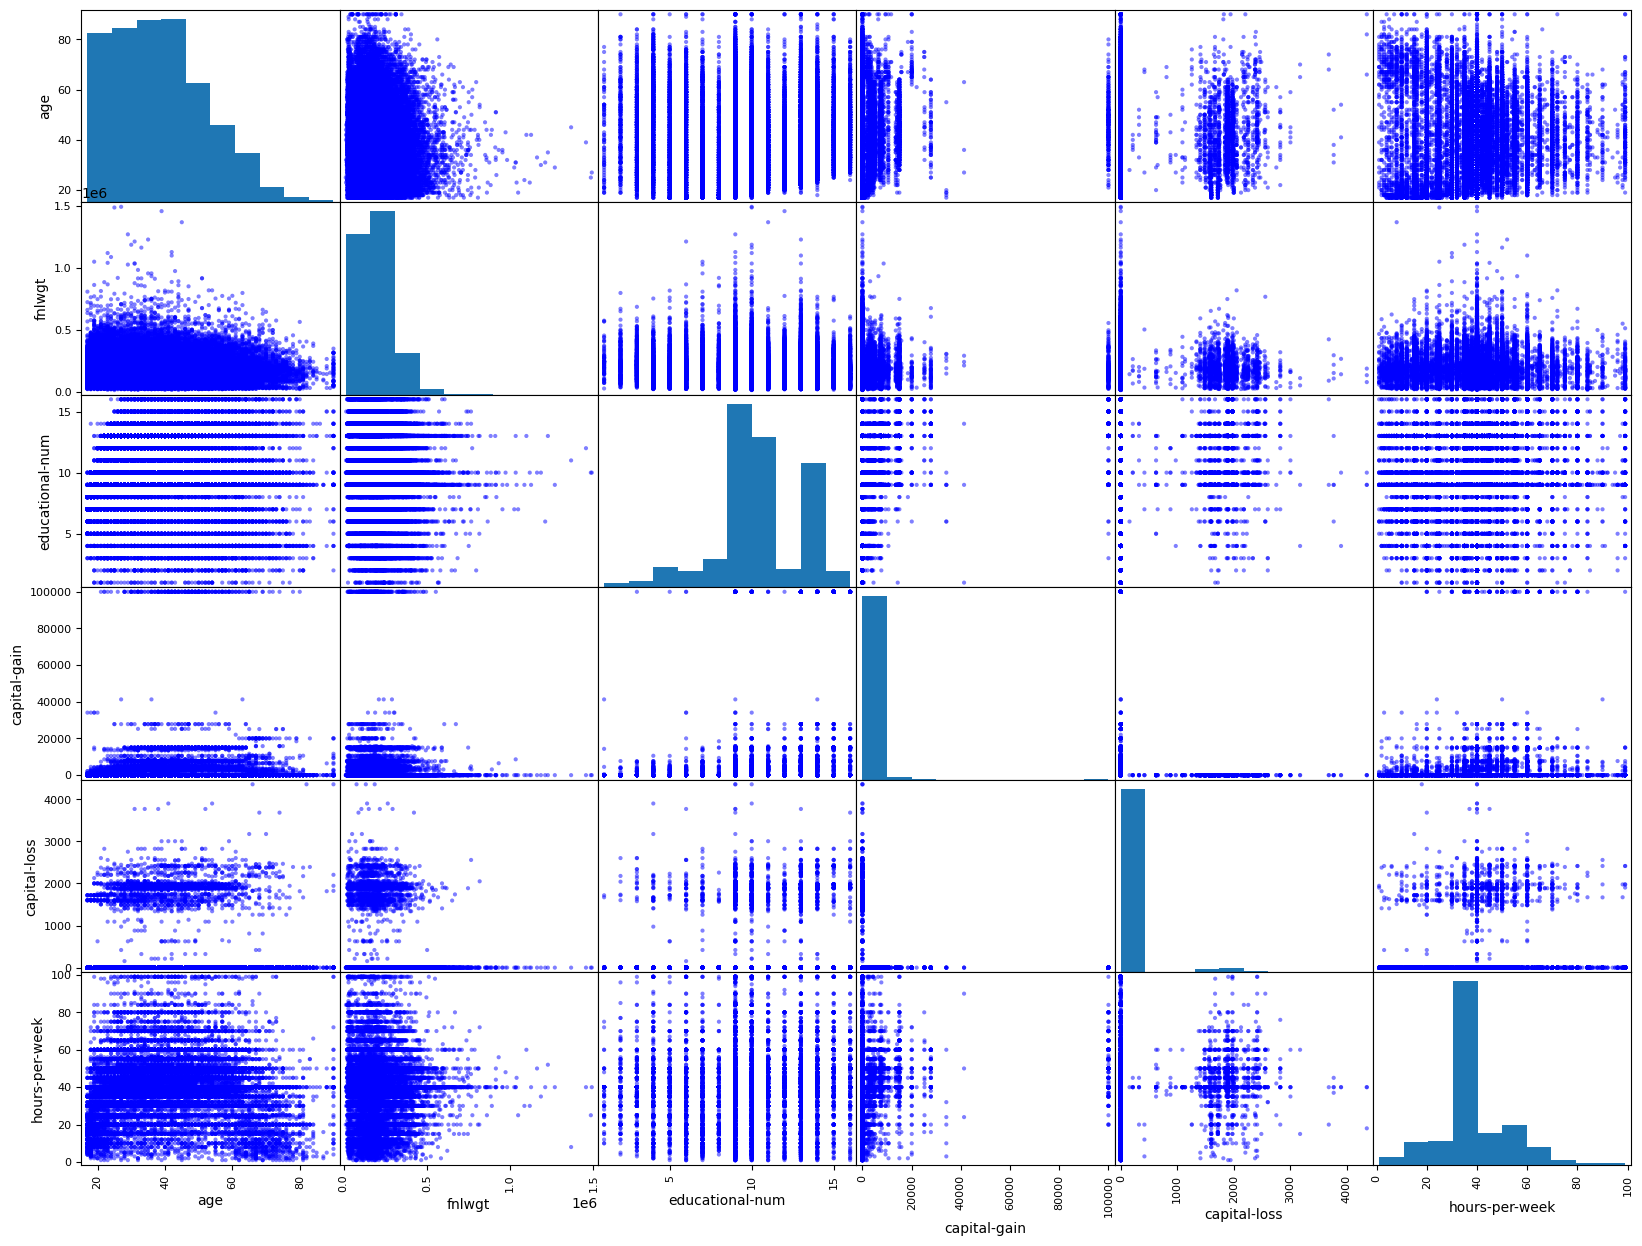

In [128]:
scatter_matrix(dataset,figsize=(20,15),color='blue')
plt.show()

### 12-nettoyages des données: 

#### 12.1 l'histogramme des valeurs manquantes:  

<AxesSubplot: >

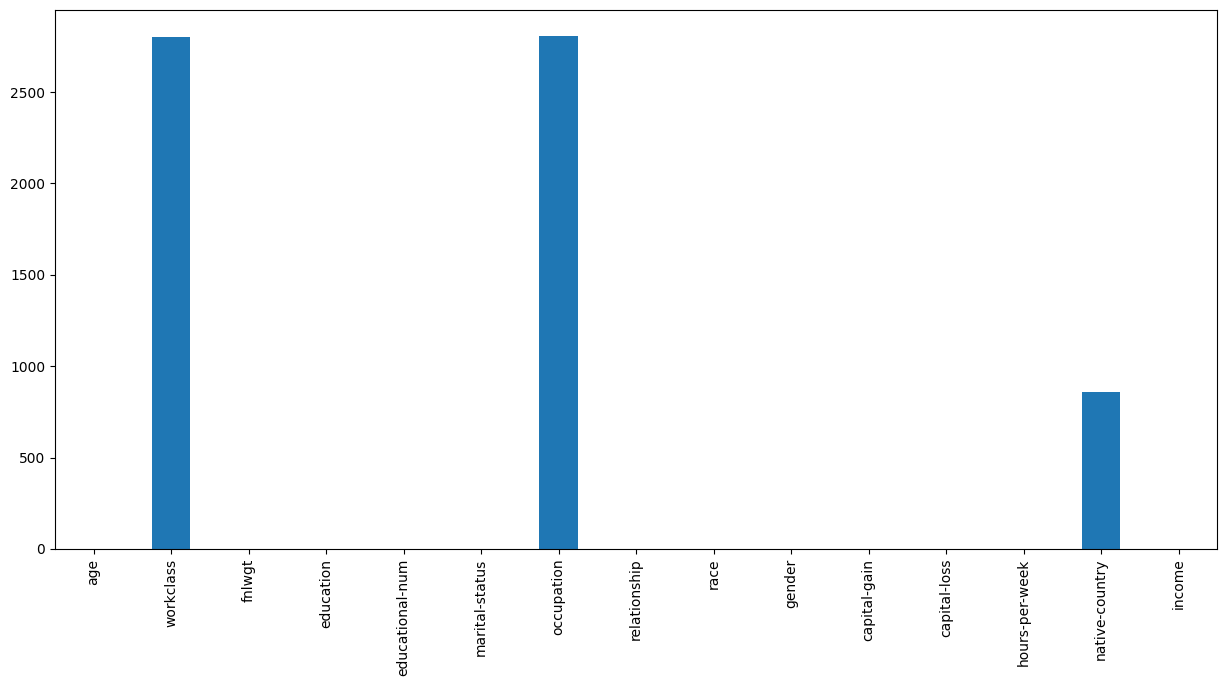

In [129]:
dataset.isin(['?']).sum().plot(kind='bar', figsize=(15,7))

on constate qu'on a des valeurs manquants dans les colones (workclass,occupation,native_country).

#### 12.2 remplacement des valeurs manquantes par la valeur qui a le plus nombre d'occurences:  


In [130]:
dataset.loc[dataset['occupation']=='?','occupation'] = dataset['occupation'].value_counts().idxmax()
dataset.loc[dataset['workclass']=='?','workclass'] = dataset['workclass'].value_counts().idxmax()
dataset.loc[dataset['native-country']=='?','native-country'] = dataset['native-country'].value_counts().idxmax()

#### 12.3 vérification du remplissage des valeurs manquants:  


<AxesSubplot: >

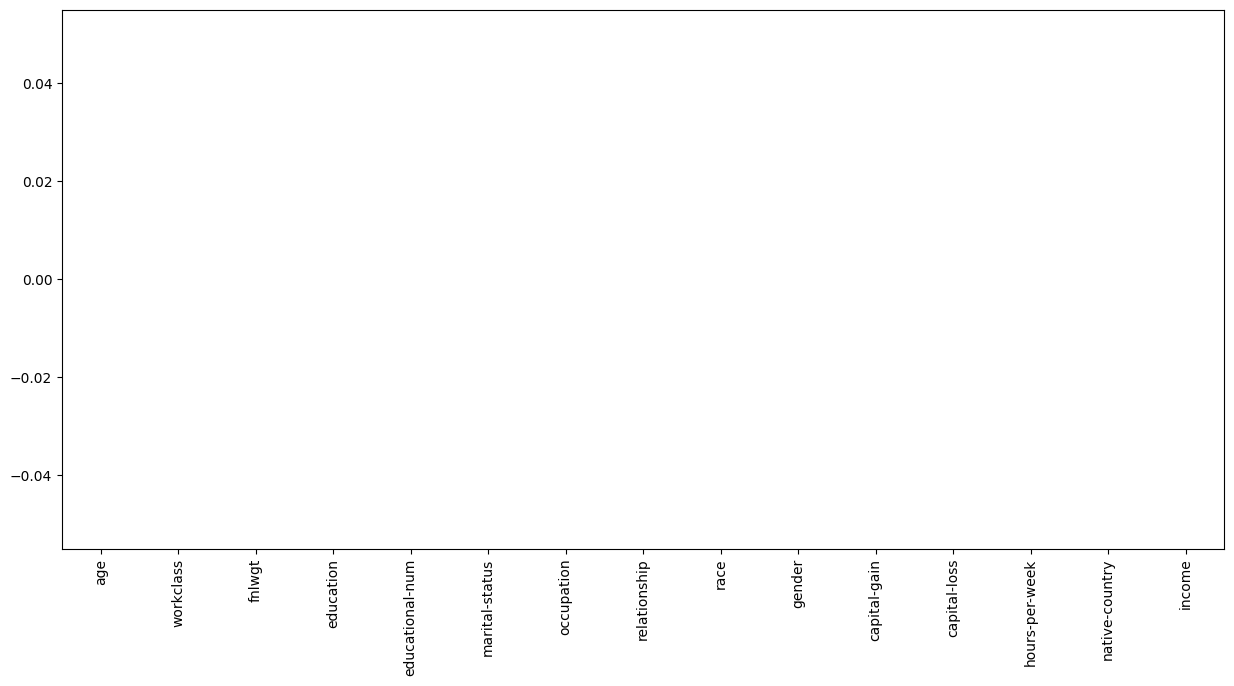

In [131]:
dataset.isin(['?']).sum().plot(kind='bar', figsize=(15,7))


### 13-la fonction du conversion des valeurs catégorielle en valeurs numériques:  

In [132]:
def category_to_num(dset, columns):
    enc = LabelEncoder()
    for item in columns:
        enc.fit(dset[item])
        dset[item] = enc.transform(dset[item])
    return dset

### 14-la corrélation entre les attributs: 

//la conversion des valeurs catégorielle en valeurs numériques,et aprés le calcul des corélations entre les attributs.

In [133]:
correlation = category_to_num(dataset, [i for i in dataset if i  in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','gender','native-country','income']])
correlation.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.045643,-0.076628,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369
workclass,0.045643,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511
fnlwgt,-0.076628,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058534,-0.006339
education,-0.015058,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091
educational-num,0.030940,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613
marital-status,-0.263978,-0.020870,0.029851,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017919,-0.199072
occupation,-0.000133,0.009841,-0.002253,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014518,0.011082,-0.015550,-0.001577,0.032550
relationship,-0.263383,-0.056073,0.009092,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999,-0.253214
race,0.028421,0.053923,-0.027062,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.117553,0.070934
gender,0.088120,0.066672,0.027739,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002453,0.214628


### 15-l'affichage des corrélations entre les attributs dans le heatmap:

<AxesSubplot: >

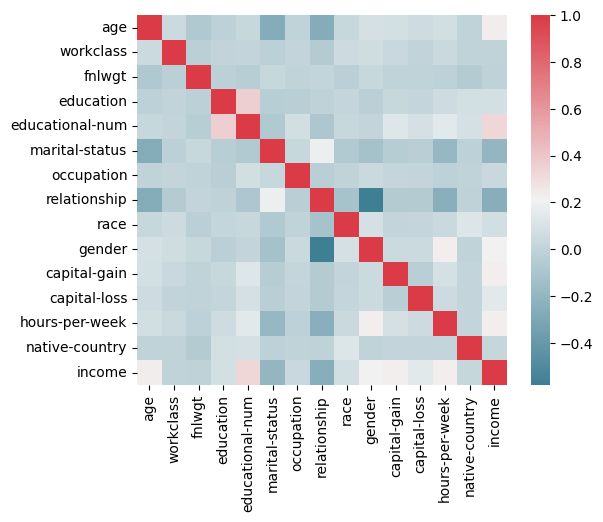

In [134]:
correlation2 = correlation.corr()
sns.heatmap(correlation2, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

on remarque que les deux attributs 'marital-status' et 'relationship'ont la plus grande correlation avec les autres attributs(car les valeurs absolues des correlations de ces deux attributs avec les autres attributs sont grands), donc on peut les retirer.

In [135]:
for item in ["marital-status", "relationship"]:
    dataset = dataset.drop([item], axis=1)

l'affichage des résultas aprés la suppression des deux attributs: 

In [136]:
dataset

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,6,2,1,0,0,40,38,0
1,38,3,89814,11,9,4,4,1,0,0,50,38,0
2,28,1,336951,7,12,10,4,1,0,0,40,38,1
3,44,3,160323,15,10,6,2,1,7688,0,40,38,1
4,18,3,103497,15,10,9,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,12,4,0,0,0,38,38,0
48838,40,3,154374,11,9,6,4,1,0,0,40,38,1
48839,58,3,151910,11,9,0,4,0,0,0,40,38,0
48840,22,3,201490,11,9,0,4,1,0,0,20,38,0


### 16- Création et	validation des modèles:

#### 16.1-division des données en deux ensembles(les données d'apprentissage et les données du test) 

In [137]:
train_data,test_data = model_selection.train_test_split(dataset, test_size=0.2)


In [138]:
train_data

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
27756,28,1,283227,15,10,3,4,1,0,0,65,38,0
3238,29,5,394356,11,9,4,4,1,0,0,40,38,0
32167,22,5,32921,15,10,4,4,1,0,0,20,38,0
7321,35,3,109133,11,9,6,4,1,3674,0,52,38,0
26470,39,5,52870,11,9,2,4,1,0,0,40,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48695,29,3,83742,11,9,7,4,0,0,0,45,38,0
16084,56,3,235136,5,4,0,4,1,0,0,40,5,0
30926,32,3,402089,9,13,0,4,0,0,0,2,38,0
45384,47,3,186534,11,9,11,4,1,0,0,55,38,1


In [139]:
test_data

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8307,23,3,308924,11,9,2,4,1,0,0,40,38,0
40588,42,3,191765,11,9,0,2,0,0,2339,40,37,0
670,19,3,181652,15,10,0,4,0,0,0,24,38,0
10704,43,3,111829,8,11,9,4,0,0,0,40,38,0
11479,26,3,322585,11,9,11,4,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15465,35,6,189794,11,9,7,4,0,0,0,40,38,0
11977,47,3,155890,9,13,9,4,1,7688,0,40,38,1
33764,24,1,203924,9,13,10,4,1,0,0,45,38,0
33908,26,3,279833,9,13,3,4,1,0,2258,45,38,1


#### 16.2-division des données  d'apprentissage en deux ensembles (75% pour l'apprentissage et 25% pour la validation),et séparation du colone cible des autres colonnes (pour l'ensemble d'apprentissage et l'ensemble du test).


In [140]:
v_array_appr = train_data.values
v_array_test = test_data.values
# Sélectionner toutes les lignes et les 12 premières colonnes (les variables prédictives)
X_appr = v_array_appr[ : , 0 : 12]
X_test = v_array_test[ : , 0 : 12]
# Sélectionner toutes les lignes et la dernière  colonne (la variables cible)
Y_appr = v_array_appr[ : , 12]
Y_test = v_array_test[ : , 12]
# La proportion du dataset à inclure dans l’ensemble de test (évaluation)
evaluation_size = 0.25
# Pour mélanger les instances avant d'appliquer la division, il faut choisir une valeur
# entière pour avoir le même résultat après plusieurs appels de la méthode de division.
seed = 7
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_appr, Y_appr, test_size=
evaluation_size, random_state=seed)

In [141]:
X_train

array([[    33,      3, 251117, ...,      0,     40,     25],
       [    71,      3, 365996, ...,      0,     42,     38],
       [    45,      3, 122002, ...,      0,     40,     38],
       ...,
       [    59,      3, 140569, ...,      0,     60,     38],
       [    66,      0,  38621, ...,      0,     40,     38],
       [    28,      3, 168524, ...,      0,     38,     38]], dtype=int64)

In [142]:
print(X_train.shape)


(29304, 12)


In [143]:
print(Y_train.shape)

(29304,)


#### 16.3-validation des trois models: 

#### le troixiéme model qu'on a choisit c'est RandomForestClassifier.

In [144]:
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Création de l'objet de modèle de classification
models = []
resultats=[]
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))

# Définition des valeurs possibles pour l'hyperparamètre à optimiser
# Création de l'objet GridSearchCV
for name, model in models:
    if name=='KNC':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif name=='DTC':
        param_grid = {'min_samples_split': [2, 5, 10]}
    elif name=='RFC':
        param_grid = {'n_estimators': [10, 50, 100, 200]}
    grid_search = GridSearchCV(model, param_grid, cv=5)
    # Entraînement du modèle en utilisant la recherche de grille d'hyperparamètres
    grid_search.fit(X_val, Y_val)
    resultats.append((name, grid_search))
    # Affichage des meilleurs hyperparamètres trouvés par la recherche de grille
    print("Meilleurs hyperparamètres pour le model : ",name," est : ", grid_search.best_params_)

Meilleurs hyperparamètres pour le model :  KNC  est :  {'n_neighbors': 9}
Meilleurs hyperparamètres pour le model :  DTC  est :  {'min_samples_split': 10}
Meilleurs hyperparamètres pour le model :  RFC  est :  {'n_estimators': 50}


In [145]:
for name,performance in resultats:
    print("la perfermance du model: ",name," est: ", performance.best_score_)

la perfermance du model:  KNC  est:  0.784010846499703
la perfermance du model:  DTC  est:  0.7949645743550718
la perfermance du model:  RFC  est:  0.8315071005895451


#### 17-le test du model RFC: 

#### d'aprés l'étape précédent on constate que le model le plus performant est RFC. donc on va l'utiliser dans le test

In [146]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

RFC_TEST = RandomForestClassifier()
RFC_TEST.fit(X_appr, Y_appr)
predictions = RFC_TEST.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8407206469444161
[[6973  489]
 [1067 1240]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7462
           1       0.72      0.54      0.61      2307

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769

